In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fastsst.sst import SingularSpectrumTransformation

# Data
source: https://github.com/dwicke/TSAT

In [6]:
# url = "https://raw.githubusercontent.com/GrammarViz2/grammarviz2_src/master/data/TEK16.txt"
url = "https://raw.githubusercontent.com/dwicke/TSAT/master/data/twitter_raw.csv"
# url = "https://raw.githubusercontent.com/GrammarViz2/grammarviz2_src/master/data/ecg0606_1.csv"
# url = "https://raw.githubusercontent.com/GrammarViz2/grammarviz2_src/master/data/dutch_power_demand.txt"
df = pd.read_csv(url,header=None)

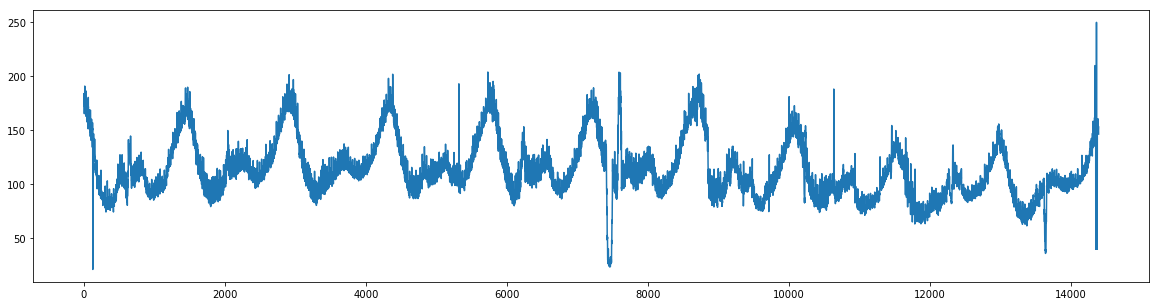

In [7]:
x = df.values[:,0]
plt.figure(figsize=(20,5))
plt.plot(x)

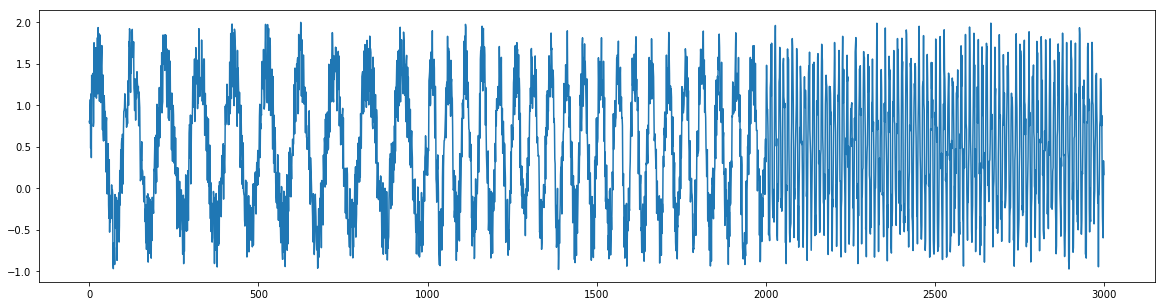

In [14]:
# synthetic (sinusoidal wave & frequency change)
x0 = np.sin(2*np.pi*1*np.linspace(0,10,1000))
x1 = np.sin(2*np.pi*2*np.linspace(0,10,1000))
x2 = np.sin(2*np.pi*8*np.linspace(0,10,1000))
x = np.hstack([x0,x1,x2])
x +=  + np.random.rand(x.size)
plt.figure(figsize=(20,5))
plt.plot(x)

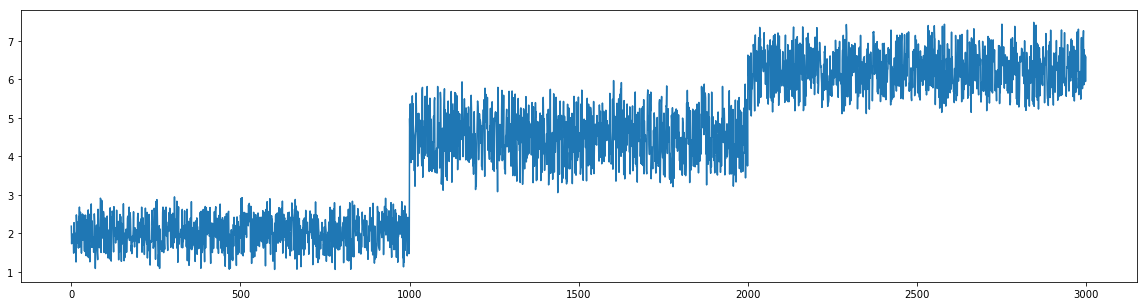

In [9]:
# synthetic (step function)
x0 = 1 * np.ones(1000) + np.random.rand(1000) * 1
x1 = 3 * np.ones(1000) + np.random.rand(1000) * 2
x2 = 5 * np.ones(1000) + np.random.rand(1000) * 1.5
x = np.hstack([x0,x1,x2])
x +=  + np.random.rand(x.size)
plt.figure(figsize=(20,5))
plt.plot(x)

# SST

## timing comparison

In [11]:
# lanczos with jit
from sst.sst import SingularSpectrumTransformation
sst = SingularSpectrumTransformation(50)
%timeit sst.score_offline(x)

382 ms ± 9.95 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
# svd with jit
from sst.sst import SingularSpectrumTransformation
sst = SingularSpectrumTransformation(50,use_lanczos=False)
%timeit sst.score_offline(x)

5.18 s ± 113 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
# lanczos without jit
from sst.sst import SingularSpectrumTransformation
sst = SingularSpectrumTransformation(50)
%timeit sst.score_offline(x)

1.21 s ± 37.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [37]:
# svd without jit
from sst.sst import SingularSpectrumTransformation
sst = SingularSpectrumTransformation(50,use_lanczos=False)
%timeit sst.score_offline(x)

6.37 s ± 132 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## score

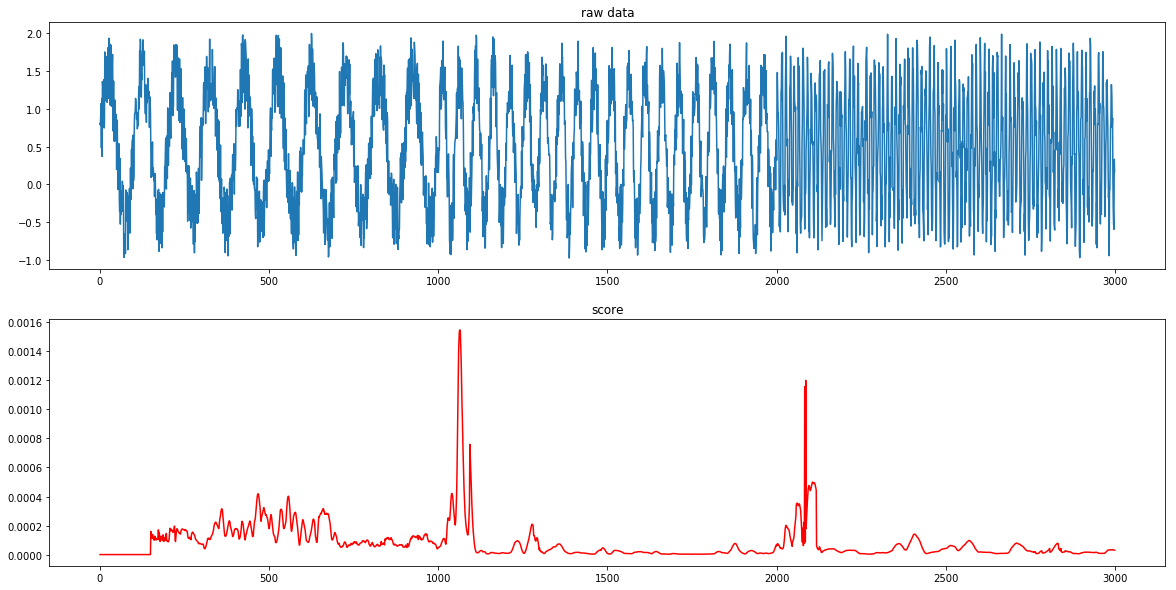

In [51]:
from fastsst.sst import SingularSpectrumTransformation
score = SingularSpectrumTransformation(60,use_lanczos=True).score_offline(x)
f,ax = plt.subplots(2,1,figsize=(20,10))
ax[0].plot(x); ax[0].set_title("raw data")
ax[1].plot(score,"r"); ax[1].set_title("score")

In [3]:
from numba import jit,njit
from scipy.linalg import eigh_tridiagonal

In [104]:
SIZE = 100
d = 3*np.ones(SIZE)
e = -1*np.ones(SIZE - 1)
A = np.diag(d) + np.diag(e, k=1) + np.diag(e, k=-1)

# scipy
ws, vs = eigh_tridiagonal(d, e)

# numpy svd
vn,wn,_ = np.linalg.svd(A)

# power method
from fastsst.util.linear_algebra import power_method
x0 = np.random.rand(A.shape[0])
x0 /= np.linalg.norm(x0)
vp,wp,_ = power_method(A,x0,n_iter=100)

In [100]:
%timeit eigh_tridiagonal(d,e)

210 µs ± 10.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [103]:
%timeit power_method(A,x0,n_iter=100)

131 µs ± 2.27 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [102]:
%timeit np.linalg.svd(A)

86.2 µs ± 8.09 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [4]:
from scipy.linalg import eigh_tridiagonal
SIZE = 10000
d = 3*np.ones(SIZE)
e = -1*np.ones(SIZE - 1)
w, v = eigh_tridiagonal(d, e)
A = np.diag(d) + np.diag(e, k=1) + np.diag(e, k=-1)

In [5]:
%timeit np.linalg.svd(A)

3min 20s ± 3.49 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
%timeit eigh_tridiagonal(d,e)

17.2 s ± 148 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
from scipy.linalg import eigh_tridiagonal
SIZE = 20
d = 3*np.ones(SIZE)
e = -1*np.ones(SIZE - 1)
w, v = eigh_tridiagonal(d, e)
A = np.diag(d) + np.diag(e, k=1) + np.diag(e, k=-1)

In [15]:
%timeit np.linalg.svd(A,full_matrices=False)

135 µs ± 3.95 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [14]:
%timeit eigh_tridiagonal(d,e)

125 µs ± 5.59 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
